<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(_2_8)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,31.550624,96.827191,53.845245,85.254794,0.002317,277.480171,277.478257,0.001914
1,0.0,1.0,74.393251,42.734809,97.765649,81.230758,-0.007512,306.116956,306.125400,-0.008444
2,0.0,2.0,59.297489,63.996252,77.034237,25.729835,-0.006997,236.050815,236.057631,-0.006816
3,0.0,3.0,76.571705,35.079692,80.797695,55.155693,-0.012148,257.592637,257.605545,-0.012907
4,0.0,4.0,83.247381,74.183606,33.658857,40.661651,-0.002509,241.748986,241.751616,-0.002630
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,72.313437,76.179782,81.307826,46.469954,-0.000719,286.270279,286.271946,-0.001666
119996,999.0,116.0,31.688675,25.414744,23.219725,54.533604,0.016195,144.872944,144.855052,0.017892
119997,999.0,117.0,49.186237,78.127180,99.898480,52.207319,-0.000116,289.419100,289.419931,-0.000831
119998,999.0,118.0,57.437085,27.018286,95.604289,34.746231,0.004089,224.809981,224.806155,0.003825


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    31.550624  96.827191  53.845245  85.254794  0.002317  277.480171   
      1.0    74.393251  42.734809  97.765649  81.230758 -0.007512  306.116956   
      2.0    59.297489  63.996252  77.034237  25.729835 -0.006997  236.050815   
      3.0    76.571705  35.079692  80.797695  55.155693 -0.012148  257.592637   
      4.0    83.247381  74.183606  33.658857  40.661651 -0.002509  241.748986   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  72.313437  76.179782  81.307826  46.469954 -0.000719  286.270279   
      116.0  31.688675  25.414744  23.219725  54.533604  0.016195  144.872944   
      117.0  49.186237  78.127180  99.898480  52.207319 -0.000116  289.419100   
      118.0  57.437085  27.018286  95.604289  34.746231  0.004089  224.809981   
      119.0  66.765062  20.783276  29.409634  27.520957 -0.013106  154.465823   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    277.478257  0.001914  
      1.0    306.125400 -0.008444  
      2.0    236.057631 -0.006816  
      3.0    257.605545 -0.012907  
      4.0    241.751616 -0.002630  
...                 ...       ...  
999.0 115.0  286.271946 -0.001666  
      116.0  144.855052  0.017892  
      117.0  289.419931 -0.000831  
      118.0  224.806155  0.003825  
      119.0  154.478311 -0.012489  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    31.550624  96.827191  53.845245  85.254794  0.002317  277.480171   
      1.0    74.393251  42.734809  97.765649  81.230758 -0.007512  306.116956   
      2.0    59.297489  63.996252  77.034237  25.729835 -0.006997  236.050815   
      3.0    76.571705  35.079692  80.797695  55.155693 -0.012148  257.592637   
      4.0    83.247381  74.183606  33.658857  40.661651 -0.002509  241.748986   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  72.313437  76.179782  81.307826  46.469954 -0.000719  286.270279   
      116.0  31.688675  25.414744  23.219725  54.533604  0.016195  144.872944   
      117.0  49.186237  78.127180  99.898480  52.207319 -0.000116  289.419100   
      118.0  57.437085  27.018286  95.604289  34.746231  0.004089  224.809981   
      119.0  66.765062  20.783276  29.409634  27.520957 -0.013106  154.465823   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    277.478257  0.001914  
      1.0    306.125400 -0.008444  
      2.0    236.057631 -0.006816  
      3.0    257.605545 -0.012907  
      4.0    241.751616 -0.002630  
...                 ...       ...  
999.0 115.0  286.271946 -0.001666  
      116.0  144.855052  0.017892  
      117.0  289.419931 -0.000831  
      118.0  224.806155  0.003825  
      119.0  154.478311 -0.012489  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,31.550624,96.827191,53.845245,85.254794,0.002317,277.480171,277.478257,0.001914
1,0.0,1.0,74.393251,42.734809,97.765649,81.230758,-0.007512,306.116956,306.125400,-0.008444
2,0.0,2.0,59.297489,63.996252,77.034237,25.729835,-0.006997,236.050815,236.057631,-0.006816
3,0.0,3.0,76.571705,35.079692,80.797695,55.155693,-0.012148,257.592637,257.605545,-0.012907
4,0.0,4.0,83.247381,74.183606,33.658857,40.661651,-0.002509,241.748986,241.751616,-0.002630
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,72.313437,76.179782,81.307826,46.469954,-0.000719,286.270279,286.271946,-0.001666
119996,999.0,116.0,31.688675,25.414744,23.219725,54.533604,0.016195,144.872944,144.855052,0.017892
119997,999.0,117.0,49.186237,78.127180,99.898480,52.207319,-0.000116,289.419100,289.419931,-0.000831
119998,999.0,118.0,57.437085,27.018286,95.604289,34.746231,0.004089,224.809981,224.806155,0.003825


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    31.550624  96.827191  53.845245  85.254794  0.002317  277.480171   
      1.0    74.393251  42.734809  97.765649  81.230758 -0.007512  306.116956   
      2.0    59.297489  63.996252  77.034237  25.729835 -0.006997  236.050815   
      3.0    76.571705  35.079692  80.797695  55.155693 -0.012148  257.592637   
      4.0    83.247381  74.183606  33.658857  40.661651 -0.002509  241.748986   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  72.313437  76.179782  81.307826  46.469954 -0.000719  286.270279   
      116.0  31.688675  25.414744  23.219725  54.533604  0.016195  144.872944   
      117.0  49.186237  78.127180  99.898480  52.207319 -0.000116  289.419100   
      118.0  57.437085  27.018286  95.604289  34.746231  0.004089  224.809981   
      119.0  66.765062  20.783276  29.409634  27.520957 -0.013106  154.465823   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    277.478257  0.001914  
      1.0    306.125400 -0.008444  
      2.0    236.057631 -0.006816  
      3.0    257.605545 -0.012907  
      4.0    241.751616 -0.002630  
...                 ...       ...  
999.0 115.0  286.271946 -0.001666  
      116.0  144.855052  0.017892  
      117.0  289.419931 -0.000831  
      118.0  224.806155  0.003825  
      119.0  154.478311 -0.012489  

[120000 rows x 8 columns]

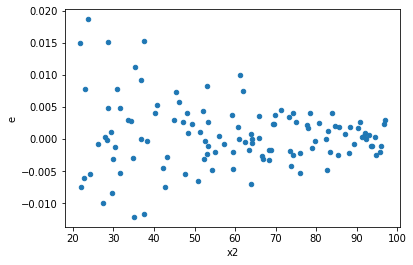

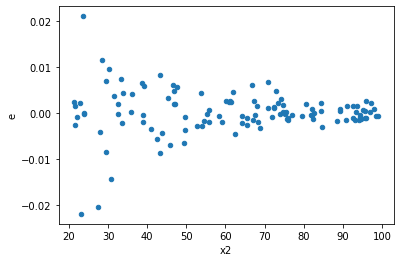

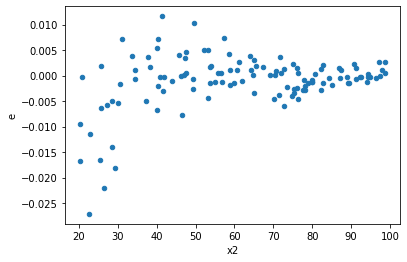

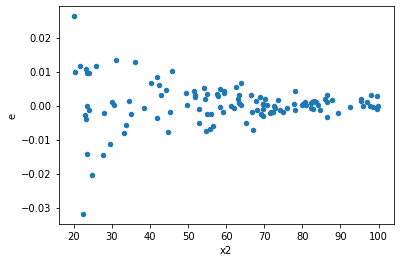

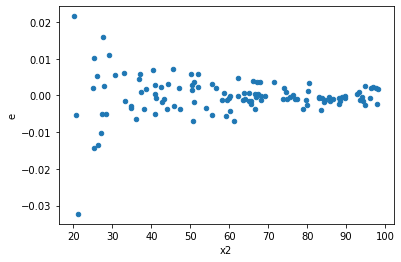

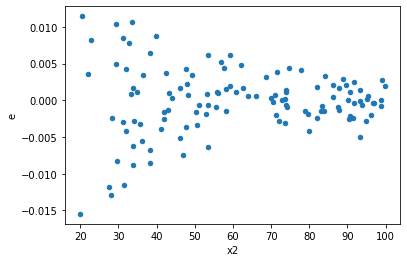

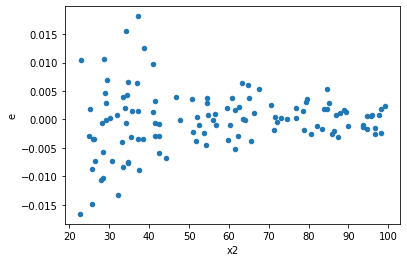

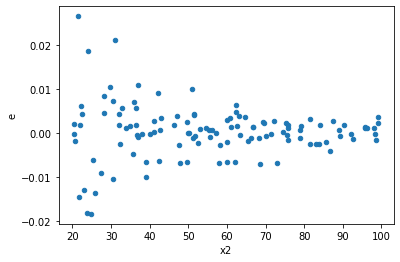

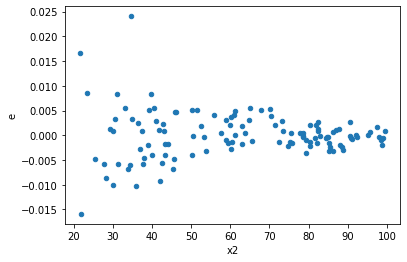

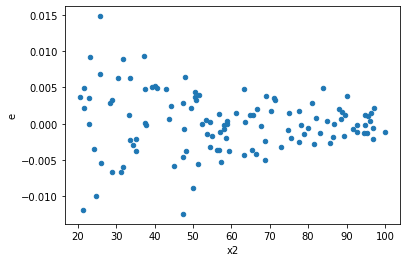

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,60.0,52.0,0.0007084144020277288,0.001946820912368849,1.1806906700462146e-05,3.743886369940094e-05,3.170929071365958,3.8072239822106724e-05,0.999980963880089,1.9036119911053362e-05,Reject005=0 : Heteroscedasticity
1.0,67.0,45.0,0.0012602266142548244,0.0014044904500586262,1.8809352451564545e-05,3.121089889019169e-05,1.65932872865039,0.07301685953012527,0.9634915702349374,0.03650842976506263,Reject005=1 : Homoscedasticity
2.0,61.0,51.0,0.0015435803913017646,0.0015229976195234576,2.530459657871745e-05,2.986269842202858e-05,1.1801294017524366,0.5454338137461971,0.7272830931269014,0.2727169068730986,Reject005=1 : Homoscedasticity
5.0,54.0,58.0,0.000591403643295293,0.0016081045672837655,1.0951919320283205e-05,2.7725940815237337e-05,2.5316056486910257,0.000626321470335256,0.9996868392648324,0.000313160735167628,Reject005=0 : Heteroscedasticity
7.0,64.0,48.0,0.002081062113817906,0.0022369442054905883,3.251659552840478e-05,4.6603004281053926e-05,1.4332067525440664,0.19381661748455126,0.9030916912577244,0.09690830874227563,Reject005=1 : Homoscedasticity
9.0,49.0,63.0,0.0006889511377241417,0.001257749173666626,1.4060227300492689e-05,1.9964272597882954e-05,1.4199110847364025,0.1891403225261421,0.905429838736929,0.09457016126307105,Reject005=1 : Homoscedasticity
10.0,51.0,61.0,0.0012032147248329861,0.0015305418213275971,2.3592445584960514e-05,2.5090849529960608e-05,1.0635120229314117,0.8129273751692101,0.593536312415395,0.40646368758460505,Reject005=1 : Homoscedasticity
13.0,49.0,63.0,0.001174990649927915,0.0023380474872510483,2.397940101893704e-05,3.7111864877000764e-05,1.5476560422711452,0.10233076037216304,0.9488346198139185,0.05116538018608152,Reject005=1 : Homoscedasticity
15.0,66.0,46.0,0.0002889856113692232,0.0029456128216762936,4.3785698692306544e-06,6.4035061340789e-05,14.62465217028509,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,60.0,52.0,0.0007084144020277288,0.001946820912368849,1.1806906700462146e-05,3.743886369940094e-05,3.170929071365958,3.8072239822106724e-05,Reject005=0 : Heteroscedasticity
1.0,67.0,45.0,0.0012602266142548244,0.0014044904500586262,1.8809352451564545e-05,3.121089889019169e-05,1.65932872865039,0.07301685953012527,Reject005=1 : Homoscedasticity
2.0,61.0,51.0,0.0015435803913017646,0.0015229976195234576,2.530459657871745e-05,2.986269842202858e-05,1.1801294017524366,0.5454338137461971,Reject005=1 : Homoscedasticity
3.0,60.0,52.0,0.0025742862735432985,0.001814719450722275,4.290477122572164e-05,3.4898450975428364e-05,0.8133932422533594,0.4383435744300897,Reject005=1 : Homoscedasticity
4.0,52.0,60.0,0.0019522607171612155,0.0014025862732784723,3.754347533002338e-05,2.337643788797454e-05,0.6226498128499172,0.08253999538584757,Reject005=1 : Homoscedasticity
5.0,54.0,58.0,0.000591403643295293,0.0016081045672837655,1.0951919320283205e-05,2.7725940815237337e-05,2.5316056486910257,0.000626321470335256,Reject005=0 : Heteroscedasticity
6.0,71.0,41.0,0.0025391365041717005,0.000348293154615251,3.57624859742493e-05,8.494954990615879e-06,0.2375381565121802,1.1501895042656597e-07,Reject005=0 : Heteroscedasticity
7.0,64.0,48.0,0.002081062113817906,0.0022369442054905883,3.251659552840478e-05,4.6603004281053926e-05,1.4332067525440664,0.19381661748455126,Reject005=1 : Homoscedasticity
8.0,56.0,56.0,0.0014708338165224464,0.0009312869184347268,2.6264889580757972e-05,1.6630123543477266e-05,0.6331693682679986,0.09005706143514872,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    597
Reject005=1 : Homoscedasticity      403
Name: Result_test, dtype: int64